# Milestone 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd #Standard python libraries

import matplotlib.pyplot as plt #Library for data visualization
import seaborn as sns #Library for data visualization

from sklearn.metrics.pairwise import cosine_similarity #For cos similarity between vectors
from collections import defaultdict #A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error # performance measure in sklearn

In [3]:
#importing the datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

In [ ]:
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


Count_df has 4 columns
  - Unnamed: 0 which is identical to the index. This can probably be dropped
  - user_id and song_id which are both object types
  - ply_count which is numeric

In [ ]:
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


song_df has 5 columns:
  - song_id, which corresponds to song_id in count_df. This is our common point
  - title and release which both have null values that will need to be taken care of
  - artist name which is an object type
  - year which is a numeric type

In [ ]:
df = count_df.merge(song_df, how = 'left', on = 'song_id').drop_duplicates()

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Creating Label Encoder
labelencoder = LabelEncoder()

#Fitting encoder
df['song_id_encoded'] = labelencoder.fit_transform(df['song_id'])
df['user_id_encoded'] = labelencoder.fit_transform(df['user_id'])

df

,user_id,song_id,play_count,title,release,artist_name,year,song_id_encoded,user_id_encoded
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,153,54961
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,413,54961
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,736,54961
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,750,54961
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1188,54961
...,...,...,...,...,...,...,...,...,...
2086941,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0,3660,64590
2086942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009,3736,64590
2086943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007,3744,64590
2086944,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010,3893,64590


In [ ]:
df = df.drop(['user_id'], axis = 1)
df = df.drop(['song_id'], axis = 1)

In [ ]:
df

,play_count,title,release,artist_name,year,song_id_encoded,user_id_encoded
0,1,The Cove,Thicker Than Water,Jack Johnson,0,153,54961
1,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,413,54961
2,1,Stronger,Graduation,Kanye West,2007,736,54961
4,1,Constellations,In Between Dreams,Jack Johnson,2005,750,54961
5,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,1188,54961
...,...,...,...,...,...,...,...
2086941,2,Ignorance (Album Version),Ignorance,Paramore,0,3660,64590
2086942,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009,3736,64590
2086943,3,What I've Done (Album Version),What I've Done,Linkin Park,2007,3744,64590
2086944,1,Up,My Worlds,Justin Bieber,2010,3893,64590


In [ ]:
users = df.user_id_encoded

ratings_count = dict()
for user in users:
  if user in ratings_count:
    ratings_count[user] += 1
  else:
    ratings_count[user] = 1

In [ ]:
ratings_cutoff = 90
remove_users = []
for user, num_ratings in ratings_count.items():
  if num_ratings < ratings_cutoff:
    remove_users.append(user)
df = df.loc[~df.user_id_encoded.isin(remove_users)]

In [ ]:
songs = df.song_id_encoded

ratings_count = dict()

for song in songs:
  if song in ratings_count:
    ratings_count[song] += 1
  else:
    ratings_count[song] = 1

In [ ]:
ratings_cutoff = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
  if num_ratings < ratings_cutoff:
    remove_songs.append(song)

df_final = df.loc[~df.song_id_encoded.isin(remove_songs)]

In [ ]:
df_final

,play_count,title,release,artist_name,year,song_id_encoded,user_id_encoded
209,1,Daisy And Prudence,Distillation,Erin McKeown,2000,447,6958
211,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,512,6958
212,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,549,6958
213,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,703,6958
214,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,719,6958
...,...,...,...,...,...,...,...
2086669,7,Sala De Recepção,O Mundo E Um Moinho,Cartola,1976,9160,47786
2086670,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,9186,47786
2086679,2,The Police And The Private,Live It Out,Metric,2005,9351,47786
2086689,1,Just Friends,Back To Black,Amy Winehouse,2006,9543,47786


In [ ]:
df_final = df_final[~(df_final['play_count'] > 5)]

df_final

NameError: ignored

In [ ]:
shape = df_final.shape

shape

(138301, 7)

In [ ]:
df_final['user_id_encoded'].nunique()

3337

In [ ]:
df_final['song_id_encoded'].nunique()

620

In [ ]:
df_final['artist_name'].nunique()

247

- We have 620 songs recorded by 247 different artists in our remaining dataframe
- Further, we have 3,337 different users who have listened to those 620 songs

In [ ]:
most_interacted_songs = df_final.groupby('title').count()
most_interacted_songs.sort_values('play_count', ascending = False)

,play_count,release,artist_name,year,song_id_encoded,user_id_encoded
title,,,,,,
Use Somebody,1602,1602,1602,1602,1602,1602
Yellow,1264,1264,1264,1264,1264,1264
Don't Stop The Music,960,960,960,960,960,960
Somebody To Love,920,920,920,920,920,920
Love Story,910,910,910,910,910,910
...,...,...,...,...,...,...
Fake Tales Of San Francisco (Explicit),70,70,70,70,70,70
Fake Tales Of San Francisco,70,70,70,70,70,70
Did it Again,47,47,47,47,47,47


In [ ]:
most_interacted_users = df_final.groupby('user_id_encoded').count()
most_interacted_users.sort_values('play_count', ascending = False)

,play_count,title,release,artist_name,year,song_id_encoded
user_id_encoded,,,,,,
61472,282,282,282,282,282,282
15733,240,240,240,240,240,240
37049,237,237,237,237,237,237
9570,204,204,204,204,204,204
10763,199,199,199,199,199,199
...,...,...,...,...,...,...
17961,1,1,1,1,1,1
45476,1,1,1,1,1,1
14662,1,1,1,1,1,1


## The top 5 most listened songs are:

  1) **Use Somebody** - 1,602 listens

  2) **Yellow** - 1,264 listens

  3) **Don't Stop the Music** - 960 listens

  4) **Somebody to Love** - 920 listens

  5) **Love Story** - 910 listens

## The Top 5 most interactive users are:

  1) **61472** - 282 songs

  2) **15733** - 240 songs

  3) **37049** - 237 songs

  4) **9570** - 204 songs

  5) 10763 - 199 songs

None of the top five users listened to even half of the available songs. This informs us that a recommendation system would be useful here.

Further, the number of listens on the most popular songs informs us that the same songs are being listened to over and over again. This is another sign that a recommendation system would be useful.

In [ ]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,9004
2007,15623
2008,16626
2009,18554
2010,5307


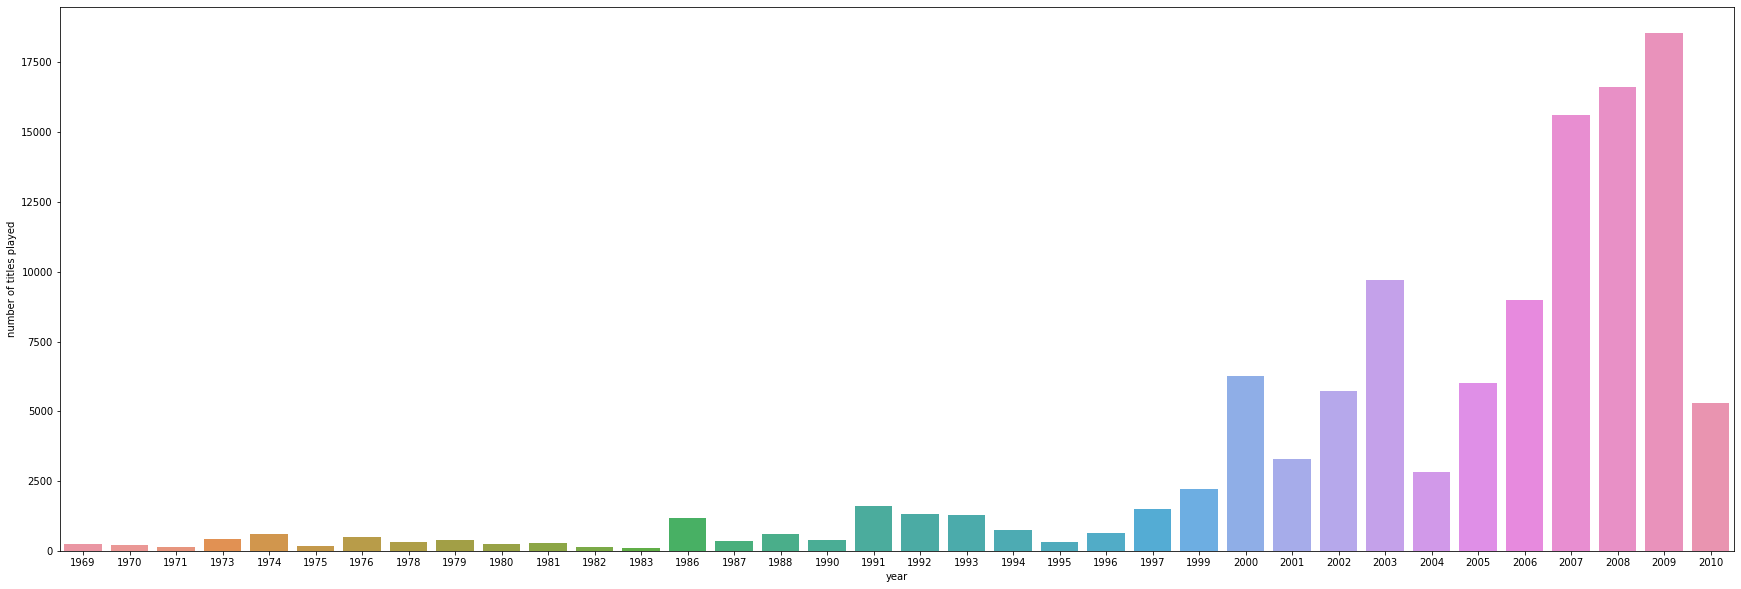

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

- We generally have a steady rise in listens
- The numbers were rather consistently low until 2000, when a large surge occured
- Since 2000, listens have continued to increase by incredibly large numbers
- This could probably be attributed to the rise of digital music, making it easier to both access and track songs
- We do see large dips in both 2004 and 2010. This could be an area for potential exploration to see what caused these dips

# Milestone 2

#### Popularity Based System

In [ ]:
# average play count
avg_count = df_final.groupby('song_id_encoded').mean()['play_count']

#play frequency
play_freq = df_final.groupby('song_id_encoded').count()['play_count']

In [ ]:
final_play = pd.DataFrame({'avg_count': avg_count, 'play_freq': play_freq})
final_play

,avg_count,play_freq
song_id_encoded,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121
...,...,...
9939,1.673640,239
9942,2.484277,159
9960,1.598592,142


In [ ]:
def top_n_songs(final_play, n):
  recommendations = final_play.sort_values(by = 'avg_count', ascending = False)

  return recommendations.index[:n]

In [ ]:
list(top_n_songs(final_play, 10))

[7224, 6450, 8324, 9942, 8483, 5531, 657, 5653, 614, 2220]

####Popularity Observations:


######top 5 recommendations:
  - 7224
  - 6450
  - 8324
  - 9942
  - 8483

#### User-User System

In [ ]:
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 7.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633756 sha256=e2ba92c91fa555fe38e7c04841e3377f1168fd845a29188b32479c32d3c76381
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

In [ ]:
#The function to calulate the RMSE, precision@k, recall@k and F_1 score. 
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    #Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top kn_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale=(0,5))

# loading the dataset
data = Dataset.load_from_df(df_final[['user_id_encoded', 'song_id_encoded', 'play_count']], reader)

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
#Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

#KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user)

RMSE: 1.0639
Precision:  0.398
Recall:  0.649
F_1 score:  0.493


###### Observations
  - The model currently has a very high RMSE of over 1 (1.08) and very low precision of 0.40
  - An F_1 score of 0.51 is also too low to be acceptable
  - The model is not performing well and will have to be tuned substantially

In [ ]:
#predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.72   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.7227331119335394, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.68   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6776559989382887, details={'actual_k': 40, 'was_impossible': False})

###### Observations:
- The model is generally not fitting overly well
- It has estimated 1.72 listens when the actual result was 2, this is somewhat close
- It predicted that user 6958 would listen to song 3232 1.68 times

In [ ]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# fitting the data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0033994669340824
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
#Build the default user-user-similarity model
sim_options = {'name': 'pearson_baseline',
               'user_based': True}

#KNN algorithm is used to find desired similar items.
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, verbose = False, random_state = 1)

# Train the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user_optimized)

RMSE: 0.9825
Precision:  0.448
Recall:  0.668
F_1 score:  0.536


###### Observations
 - The tuned model is performing better than the untuned model
 - RMSE has dropped substantially from 1.06 to 0.98
 - Precision, Recall, and F_1 have all increased

In [ ]:
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.63   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6333333333333333, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.63   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.632875323492426, details={'actual_k': 30, 'was_impossible': False})

######Observations:
- As expected based on the above results, the tuned model is actually turning out slightly worse results
- It predicted 1.63 for 6958-1671 when the actual number was 2
- The untuned model was 0.09 closer to the actual

In [ ]:
sim_user_user_optimized.get_neighbors(0, 5)

[3, 6, 8, 9, 11]

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # creating an empty list to store the recommended product ids
    recommendations = []
    
    # creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id_encoded', columns = 'song_id_encoded', values = 'play_count')
    
    # extracting those song ids which the user_id has not listened to yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_songs:
        
        # predicting the ratings for those non listened songs by this user
        est = algo.predict(user_id, item_id).est
        
        # appending the predicted ratings
        recommendations.append((item_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted play count songs for this user

In [ ]:
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id_encoded', 'predicted_plays'])

,song_id_encoded,predicted_plays
0,7224,3.274189
1,5653,2.629278
2,5344,2.599116
3,473,2.500000
4,5733,2.480252


###### Observations:
  - Based on the above, the user-user recommendation system would recommend songs 7224, 5653, 5344, 473, and 5733 to user 6958

In [ ]:
def ranking_songs(recommendations, final_play):
  # sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id_encoded', 'predicted_plays']), on ='song_id_encoded', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_plays'] = ranked_songs['predicted_plays'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_plays', ascending = False)
  
  return ranked_songs

In [ ]:
ranking_songs(recommendations, final_play)

,song_id_encoded,play_freq,predicted_plays,corrected_plays
3,7224,109,3.274189,3.178406
2,5653,110,2.629278,2.533932
1,5344,123,2.599116,2.508949
0,473,200,2.500000,2.429289
4,5733,108,2.480252,2.384027


######Observations:
  - Based on this model, user 6958 should be recommended songs 7224, 5653, 5344, 473, and 5733 in that order
  - This did not change the order, but did slightly change the predicted plays on each song

####User-User Observations:


######Final Recommended Order 
  - 7224
  - 5653
  - 5344
  - 473
  - 5733


######Final Metrics 
  - RMSE: 0.982
  - Precision: 0.448
  - Recall: 0.668
  - F_1 Score: 0.536

#### Item-Item System

In [ ]:
sim_options = {'name': 'cosine', 'user_based': False}

sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

sim_item_item.fit(trainset)

precision_recall_at_k(sim_item_item)

RMSE: 1.0154
Precision:  0.315
Recall:  0.552
F_1 score:  0.401


######Observations:
  - This has produced a slightly lower RMSE than the user-user system, but also a lower precision and F_1 score
  - This model needs serious tuning

In [ ]:
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.45   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4532417431228544, details={'actual_k': 28, 'was_impossible': False})

In [ ]:
sim_item_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 28, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.448565110455461, details={'actual_k': 28, 'was_impossible': False})

######Observations:
  - The model has predicted 1.45 listens when the actual was 2
  - This is not great performance and should be improved

In [ ]:
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

0.9894589732684103
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
sim_options = {'name':'pearson_baseline', 'user_based': False}

sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 3, random_state = 1, verbose = False)

sim_item_item_optimized.fit(trainset)

precision_recall_at_k(sim_item_item_optimized)

RMSE: 0.9705
Precision:  0.431
Recall:  0.58
F_1 score:  0.495


######Observations:
  - RMSE has dropped from 1.02 to 0.97
  - Precision, Recall, and F_1 score have all increased
  - This model is performing better than the untuned model

In [ ]:
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 2.11   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=2.111815119293358, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.39   {'actual_k': 15, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3861621030038185, details={'actual_k': 15, 'was_impossible': False})

######Observations:
  - This model has produced a significantly more accurate prediction on the know quantity (2.11 when actual is 2)
  - It has predicted 1.39 for song 3232

In [ ]:
#Finding 5 most similar neighbors
sim_item_item_optimized.get_neighbors(0, k = 5)

[10, 199, 270, 252, 166]

In [ ]:
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id_encoded', 'predicted_plays'])

,song_id_encoded,predicted_plays
0,2914,2.994684
1,4939,2.795637
2,1281,2.778152
3,657,2.701279
4,5417,2.591928


In [ ]:
ranking_songs(recommendations, final_play)

,song_id_encoded,play_freq,predicted_plays,corrected_plays
4,2914,116,2.994684,2.901836
0,1281,402,2.778152,2.728277
2,4939,138,2.795637,2.710512
1,657,159,2.701279,2.621974
3,5417,137,2.591928,2.506493


######Observations:
  - The final recommended order for the system is to recommend songs 2914, 1281, 4939, 657, and 5417 in that order
  - The highest predicted corrected plays is 2.90 (2914) and lowest is 2.51 (5417)
  - There was no crossover in the recommended songs from the user-user and item-item systems

####Item-Item Observations:
 

######Final Recommendations:
  - 2914
  - 1281
  - 4939
  - 657
  - 5417
  

######Final Metrics:
  - RMSE: 0.971
  - Precision: 0.431
  - Recall: 0.580
  - F_1 Score: 0.495

####Matrix Factorization

In [ ]:
svd = SVD(random_state = 1)

svd.fit(trainset)

precision_recall_at_k(svd)

RMSE: 0.9767
Precision:  0.419
Recall:  0.613
F_1 score:  0.498


In [ ]:
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.364520365865284, details={'was_impossible': False})

In [ ]:
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3639852777637094, details={'was_impossible': False})

In [ ]:
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.0039637769514036
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

svd_optimized.fit(trainset)

precision_recall_at_k(svd_optimized)

RMSE: 0.9946
Precision:  0.393
Recall:  0.618
F_1 score:  0.48


######Observations:
  - The optimized model is performing roughly the same as the unoptimized model
  - In fact, RMSE is actually 2% higher indicated that this is potentially overfitting
  - We should stick with the unoptimized model

In [ ]:
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3550289842876293, details={'was_impossible': False})

In [ ]:
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4795243795815582, details={'was_impossible': False})

######Observations:
  - The optimized model has performed almost exactly the same on the known quantity
  - It has provided aestimate that is 0.12 higher for song 3232 than the unoptimized model

In [ ]:
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id_encoded', 'predicted_plays'])

,song_id_encoded,predicted_plays
0,7224,2.609960
1,6450,2.414935
2,4831,2.162058
3,657,2.159103
4,5531,2.102983


In [ ]:
ranking_songs(recommendations, final_play)

,song_id_encoded,play_freq,predicted_plays,corrected_plays
3,7224,109,2.609960,2.514178
2,6450,110,2.414935,2.319589
1,657,159,2.159103,2.079798
0,5531,664,2.102983,2.064176
4,4831,98,2.162058,2.061043


####Matrix Factorization Observations

######Final Recommendations:
  - 7224
  - 6450
  - 657
  - 5531
  - 4831

######Final Metrics:
  - RMSE: 0.995
  - Precision: 0.393
  - Recall: 0.618
  - F_1 Score: 0.480

####Cluster Based System

In [ ]:
cluster_baseline = CoClustering(random_state = 1)

cluster_baseline.fit(trainset)

precision_recall_at_k(cluster_baseline)

RMSE: 1.0254
Precision:  0.375
Recall:  0.555
F_1 score:  0.448


In [ ]:
cluster_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 0.98   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=0.9787337306503692, details={'was_impossible': False})

In [ ]:
cluster_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.66   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6626966619588004, details={'was_impossible': False})

In [ ]:
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.0504969405598197
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


In [ ]:
cluster_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

cluster_tuned.fit(trainset)

precision_recall_at_k(cluster_tuned)

RMSE: 1.0403
Precision:  0.378
Recall:  0.551
F_1 score:  0.448


######Observations:
  - The tuned model is not performing significantly different than the untuned model

In [ ]:
cluster_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.92   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.923099271602349, details={'was_impossible': False})

In [ ]:
cluster_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.16   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1633033621212514, details={'was_impossible': False})

######Observations:
  - The tuned cluster model has produced the closest result on the 6958-1671 test, it is only off by 0.08
  - It has predicted 1.16 for the 6958-3232 test. This is the lowest number so far

In [ ]:
recommendations = get_recommendations(df_final, 6958, 5, cluster_tuned)

In [ ]:
ranking_songs(recommendations, final_play)

,song_id_encoded,play_freq,predicted_plays,corrected_plays
1,6450,110,3.227443,3.132097
3,8324,103,2.975972,2.877439
2,7224,109,2.929369,2.833586
0,8483,130,2.786659,2.698953
4,4831,98,2.738920,2.637905


####Cluster Based Observations

######Final Recommendations:
  - 6450
  - 8324
  - 7224
  - 8483
  - 4831

######Final Metrics:
  - RMSE: 1.040
  - Precision: 0.378
  - Recall: 0.551
  - F_1 Score: 0.448

####Content Based System

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title","release","artist_name" columns to create a different column named "text"
df_small['text'] = df_small.title.str.cat(df_small.release, sep = ' ')
df_small['text'] = df_small.text.str.cat(df_small.artist_name, sep = ' ')
df_small

,play_count,title,release,artist_name,year,song_id_encoded,user_id_encoded,text
209,1,Daisy And Prudence,Distillation,Erin McKeown,2000,447,6958,Daisy And Prudence Distillation Erin McKeown
211,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,512,6958,The Ballad of Michael Valentine Sawdust The Ki...
212,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,549,6958,I Stand Corrected (Album) Vampire Weekend Vamp...
213,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,703,6958,They Might Follow You Tiny Vipers Tiny Vipers
214,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,719,6958,Monkey Man You Know I'm No Good Amy Winehouse
...,...,...,...,...,...,...,...,...
2086668,1,Half Of My Heart,Battle Studies,John Mayer,0,9139,47786,Half Of My Heart Battle Studies John Mayer
2086670,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997,9186,47786,Bitter Sweet Symphony Bitter Sweet Symphony Th...
2086679,2,The Police And The Private,Live It Out,Metric,2005,9351,47786,The Police And The Private Live It Out Metric
2086689,1,Just Friends,Back To Black,Amy Winehouse,2006,9543,47786,Just Friends Back To Black Amy Winehouse


In [ ]:
#Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id_encoded', 'song_id_encoded', 'play_count', 'title', 'text']]

#drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])

#Set the title column as the index
df_small = df_small.set_index('title')

# see the first 5 records of the df_small dataset
df_small.head()

,user_id_encoded,song_id_encoded,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)
indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
import re
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Function to tokenize the text
def tokenize(text):
    text = re.sub(r"[^a-zA-Z]"," ",text.lower())
    tokens = word_tokenize(text)
    words = [word for word in tokens if word not in stopwords.words('english')] #Use stopwords of english
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
tfidf = TfidfVectorizer(tokenizer = tokenize)

song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # gettin the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)
    
    # populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

In [ ]:
recommendations('Learn To Fly', similar_songs)

[445, 520, 246, 465, 367, 429, 0, 416, 417, 418]


['Big Me',
 'Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Daisy And Prudence',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go']

####Content Based Observations:
  - The content based system seems to do a good job of recommending other songs by the same band
  - This could be useful if other methods are performing at a subpar level

#Conclusion and Recommendations

######Various Systems Used
  - Popularity Based
  - User-User Based
  - Item-Item Based
  - Matrix Factorization
  - Cluster Based
  - Content Based

######Final Metrics of Systems
  - Because of the nature of the system that we are building both precision and recall are important
  - Therefore we should use F_1 score as the common metric and consider the system with the highest F_1 score to be the most viable
  - Ranking of systems based on F_1 Score:
    - User-User - 0.536
    - Item-Item - 0.495
    - Matrix Factorization - 0.480
    - Cluster Based - 0.448
  - We do have outliers in both the popularity based system and content based system as these do not have an F_1 score

######Further conclusions
  - We should consider that all of the systems utilizing F_1 score reqiure a backlog of data on the user's listening history in order to perform well
  - The popularity based and content based systems can go from a cold start

######Recommendations:
  - For a brand new user we should start them with either the popularity based system, or the content based system
    - I would recommend the content based system as it does a better job of recommending songs within the same genre or by the same artist, thereby leveraging the familiarity effect
    - However, the popularity based system could work if it is more important to the company to simply push the most popular songs on the platform
  - Once a user has been on the platform for awhile (interacted with at least 50 songs) we can begin to transfer their system over to one of the 'F_1 score' systems
    - I would recommend the user-user based system as this provided the best F_1 score
    - An F_1 score of .536 means that 53.6% of recommended songs will be listened to by the user
  - 1 out of 2 is better than nothing, but could still be improved
    - One way to do this would be by implementing a simple 'thumbs-up' type system like Spotify uses
    - There are many factors that effect if a user listens to a song so this would give us a more accurate read on if they like the song or not
    - Using this info we could further tune the model an improve it by (hopefully) 20%
    - 75% would be a good metric to shoot for since this would be high enough that the average user would probably feel like every song was a hit with the occasional miss

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Capstone_Project_Milestone_2.ipynb

[NbConvertApp] Converting notebook ///content/Capstone_Project_Milestone_2.ipynb to html
[NbConvertApp] Writing 545478 bytes to ///content/Capstone_Project_Milestone_2.html
